# 第4章 ニューラルネットワークの学習

第3章で扱ったニューラルネットワークは、重み(${\bf W}$)とバイアス(${\bf b}$)を決めると、入力(${\bf x}$)から出力(${\bf y}$)が計算できます。この章で扱う学習は、多数のデータから${\bf W}$と${\bf b}$を計算する方法です。

# 4.1 データから学習する

データとして、多数の入力と出力の組みを持っていると仮定します。

$({\bf x}_1, {\bf t}_1), ({\bf x}_2, {\bf t}_2), ({\bf x}_3, {\bf t}_3), \cdots, ({\bf x}_N, {\bf t}_N)$

RTBの場合は、$i$番目のBidRequestに付随するデータを${\bf x}_i$とし、クリックしたかどうかを$t_i$とします。

手書きの数字認識の問題では、画像のpixelデータを${\bf x}_i$とし、0-9を表すデータを${\bf t}_i$とします。

入力${\bf x}_i$が与えられたときに、ニューラルネットワークを使えば予測値${\bf y}_i$が計算できます。

可能な限り${\bf y}_i$と${\bf t}_i$が近くなるようなニューラルネットワークが構築できれば、様々な入力に対して適切な出力を返すことができます。

one hot encoding??

# 4.2 損失関数

コンピュータを使って最良のパラメータの組み合わせを決定するためには、データをどれだけよく再現するかを表現する指標が必要です。

損失関数?

もっとも単純な指標は、教師データ${\bf t}_i$と予測値${\bf y}_i$の差を使って次のように定義される二乗和誤差です。

$$
    E = \frac{1}{2}\sum_k ({\bf y}_k-{\bf t}_k)^2
$$

教師データ${\bf t}_i$と予測値${\bf y}_i$が大きく異なると二乗和誤差は大きくなり、乖離が小さいと二乗和誤差は小さくなることがわかります。

別の損失関数として交差エントロピー誤差が使われます。

$$
    E = -\sum_k t_k \log y_k
$$


# 4.3 数値微分

損失関数をもっとも小さくするような重み(${\bf W}$)が計算することで最良のニューラルネットワークが計算できます。

実は関数を最小化する計算(最適化)は関数の傾きの計算、すなわち微分から決定できます。

# 微分

In [2]:
import numpy as np
import matplotlib.pyplot as plt

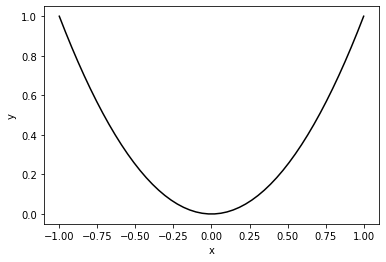

In [14]:
xs = np.linspace(-1, 1)
def plot_f():    
    ys = xs*xs
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(xs, ys, "k-", label="y=f(x)")
plot_f()

上の図は関数$f(x)=x^2$をプロットしたものです。この関数値(縦軸の値)をもっとも小さくなるような値(横軸の値)は何でしょうか？

答えは明確で$x=0$です。では、$x=0$の特徴は何でしょうか？

ひとつの特徴は、$x=0$において関数のグラフの**傾き**が$x$軸に対して水平になっていることです。

**傾き**をもう少し詳しく見ていきましょう。

直線と傾き??

接線, 
input = x0
output = slope

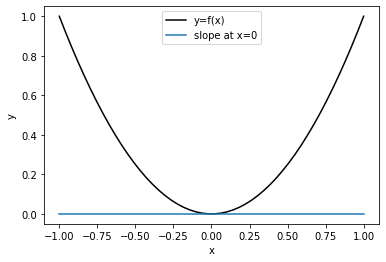

In [21]:
def plot_slope(x0, label):
    ys = 2*x0*(xs - x0) + x0*x0
    plt.plot(xs, ys, label="slope at x={}".format(x0))

plot_f()
plot_slope(0, "a")
plt.legend()

(-0.3, 1)

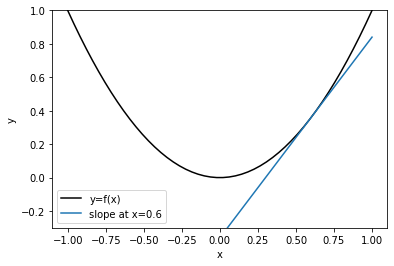

In [24]:
plot_f()
plot_slope(0.6, "a")
plt.legend()
plt.ylim(-0.3, 1)

# 4.4 勾配法

損失関数を最小化するような重み(${\bf W}$)を計算することで最良のニューラルネットワークが計算できます。そして、関数の最小化は傾きが0になるような点を探索することで得られます。合わせて考えると、損失関数に対する重みの傾きが0になる点を探索すればよいことになります。

このような傾き０の点を探索する計算の代表例として勾配法があります。これはつぎのように計算した傾きを引き算する計算を繰り返す方法です。

$$
    x := x - \eta\frac{\partial f}{\partial x}(x)
$$

ここで$\eta$はパラメータで、この値が大きいほど一つ一つのstepが大きくなります。

$\eta$ vs path ???
